In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def imshow(tit, image):
    plt.figure(figsize=(12, 8))
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title(tit)
    plt.axis('off')    
    plt.show()

In [3]:
DIR = './src/'

In [4]:
img = cv2.imread(DIR + 'lenna.bmp', 0) # gray 로 불러오기
print(img.shape)
print(img.dtype)

(512, 512)
uint8


## 화소 처리

- 포인트 연산
    - y = alpha * img + beta
    - clipping

In [5]:
dst = img.copy()

for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        dst[r,c] += 30 # overflow 발생

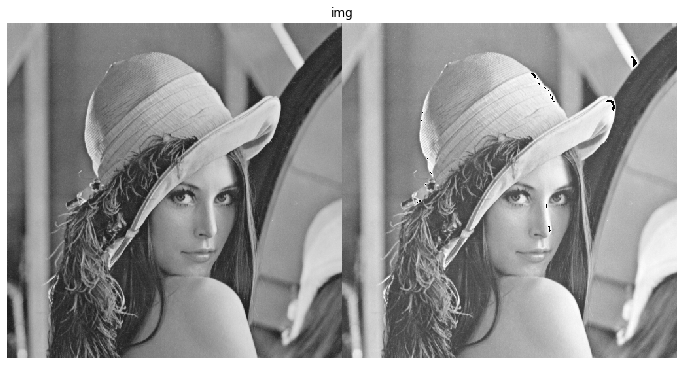

In [6]:
imshow('img', np.hstack((img,dst)))

In [7]:
dst2 = img.copy()

for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        col = img[r,c] + 100
        if col >255: col=255
        dst2[r,c] = col

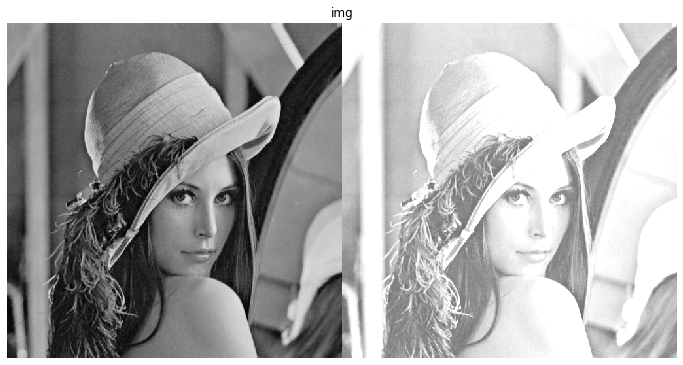

In [8]:
imshow('img', np.hstack((img,dst2)))

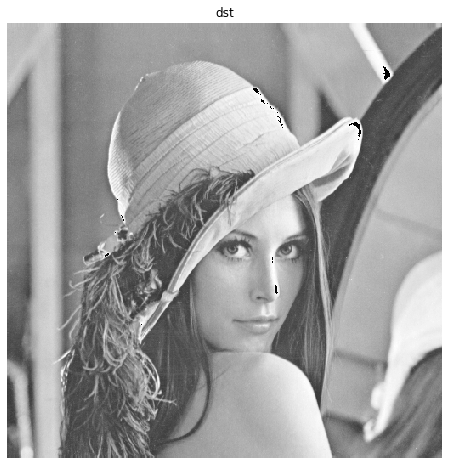

In [9]:
dst += 20
dst = img +30 # 계산 속도는 빠르나 결과가 정확하지 않음
imshow('dst', dst)

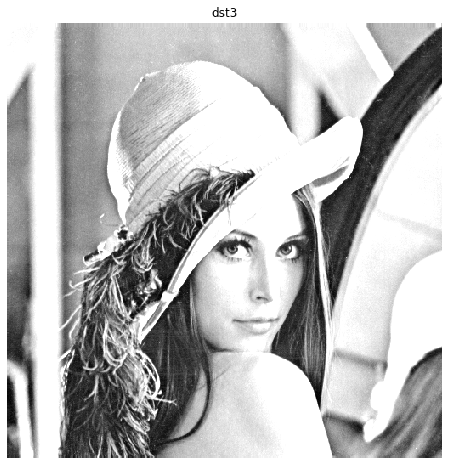

In [10]:
dst3 = img.copy()

dst3 = cv2.add(dst3, 100)
imshow('dst3',dst3)

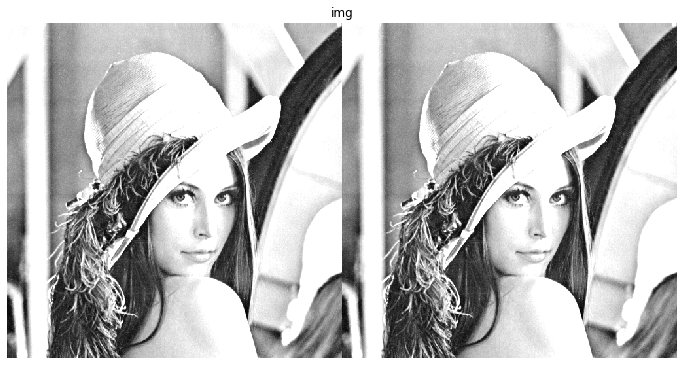

In [11]:
imshow('img', np.hstack((dst2,dst3)))

### 타입 연산

In [12]:
A = np.array([[1,5,], [10,20]]).astype('uint8')
print(A)
print(A.dtype)
B = cv2.add(A, 240)
print(B)

[[ 1  5]
 [10 20]]
uint8
[[241 245]
 [250 255]]


In [13]:
print(A)
print(A[1,1] + 250) 

b = A + 250 # int 연산
print(b) # 270으로 출력되지 않음

c = A + 250.0 # 실수 연산
print(c)

d = A+300 # 255 보다 큰 값

print("A의 타입:", A.dtype) # 자동 형변환 uint8 -> int32
print("b의 타입:", b.dtype) # 자동 형변환이 되지만 b가 uint8 타입
print("c의 타입:", c.dtype) # 자동 형변환이 되고 c가 float 타입
print("d의 타입:", d.dtype) # 자동 형변환이 되고 d가 uint16 타입

[[ 1  5]
 [10 20]]
270
[[251 255]
 [  4  14]]
[[251. 255.]
 [260. 270.]]
A의 타입: uint8
b의 타입: uint8
c의 타입: float64
d의 타입: uint16


In [14]:
dd = np.clip(A + 240.0, 0, 255) # 255가 넘어가는 경우에는 255로 고정
print(dd)

[[241. 245.]
 [250. 255.]]


In [15]:
dd = np.clip(A + 240, 0, 255) # overflow 발생
print(dd)

[[241 245]
 [250   4]]


In [16]:
dd = (np.clip(A + 240.0, 0, 255)).astype('uint8')
print(dd)
print(dd.dtype)

[[241 245]
 [250 255]]
uint8


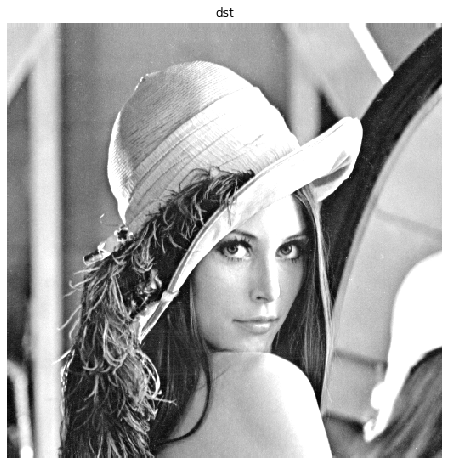

In [17]:
img = cv2.imread(DIR + 'lenna.bmp', 0)
dst = (np.clip(img + 70.0, 0, 255)).astype('uint8')
imshow('dst',dst)

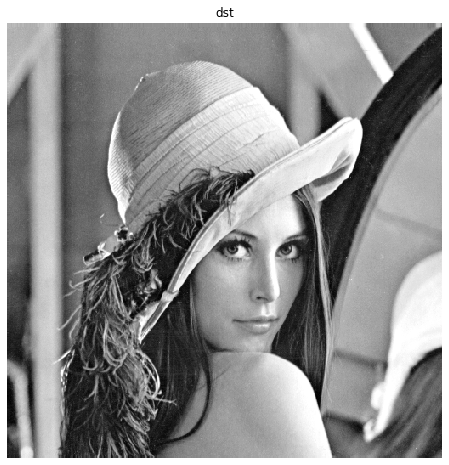

In [18]:
alpha = 1.1 # 10% 밝기 올리기
beta = 20
dst = (np.clip(alpha * img + beta, 0 ,255)).astype('uint8')

imshow('dst', dst)

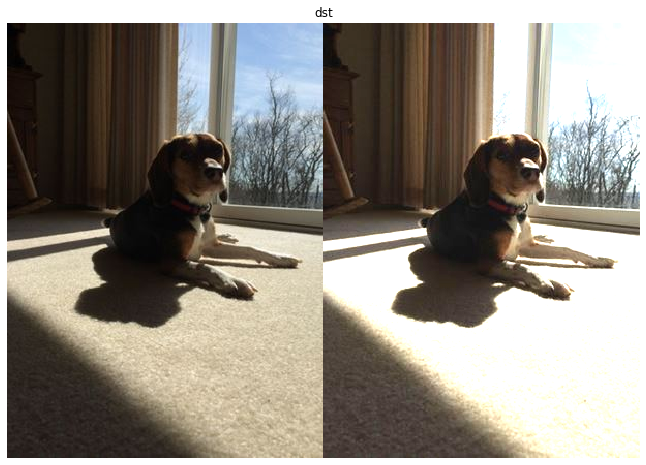

In [19]:
img = cv2.imread(DIR + 'gamma2.jpg')

alpha = 1.5
beta = 10
dst = (np.clip(alpha * img + beta, 0 ,255)).astype('uint8')

imshow('dst', np.hstack((img,dst)))

## 대비 조정

### LUT

- 비선형 변환
- 고속 변환

In [20]:
table = np.array([255-i for i in range(256)])

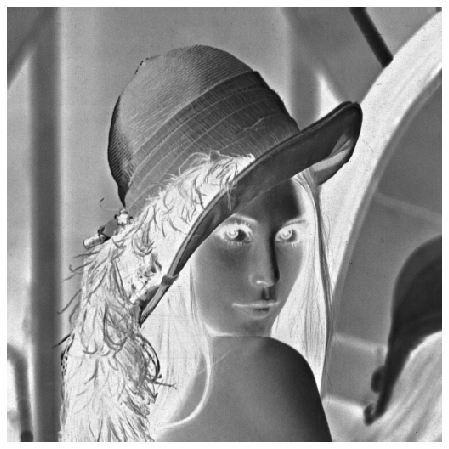

In [21]:
img1 = cv2.imread(DIR + 'lenna.bmp',0)
out = cv2.LUT(img1, table)
imshow("", out)

In [22]:
dst = img.copy()

for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        dst[r,c] = table[img[r,c]]

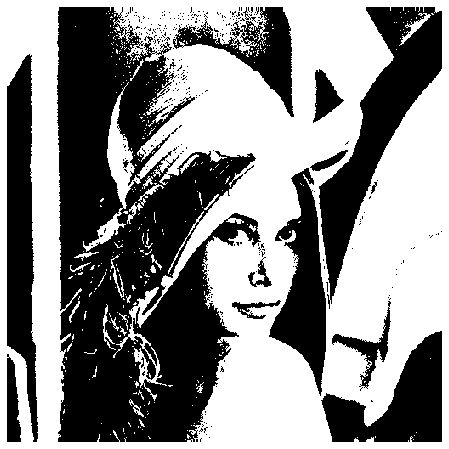

In [23]:
# threshold LUT

table = np.array([i > 127 for i in range(256)])* 255

out = cv2.LUT(img1, table)
imshow("", out)

In [24]:
p = 0.5
gamma = 1 # 감마가 1이면 원본 영상을 그대로 출력하겠다는 의미
print(p ** gamma) 

0.5


In [25]:
p = 0.5
gamma = 0 # 감마가 0이면 모든 영상을 1로 출력하겠다는 의미
print(p ** gamma) 

1.0


In [26]:
p = 0.5
gamma = 0.5 # 감마가 0보다 작으면 원래 값보다 더 커짐
print(p ** gamma)

# gamm < 1 밝아짐
# gamm = 1 그대로 출력
# gamm > 1 어두워짐

0.7071067811865476


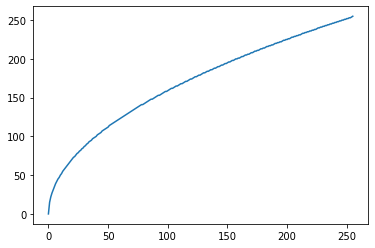

In [27]:
gamma = 0.5
table = np.array([((i/255.0)**gamma)*255 for i in np.arange(0,256)]).astype('uint8')
plt.plot(table)

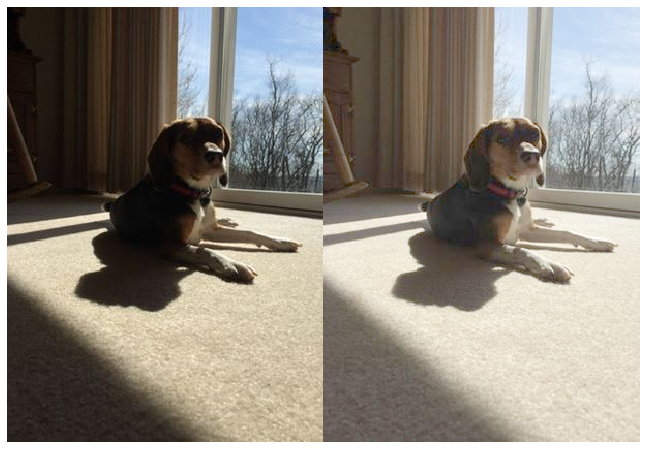

In [28]:
img1 = cv2.imread(DIR + 'gamma2.jpg')

out = cv2.LUT(img1, table)
imshow("", np.hstack((img1,out)))

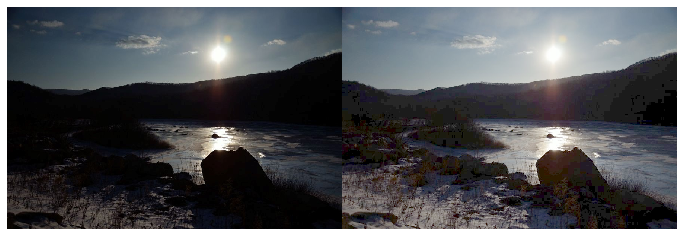

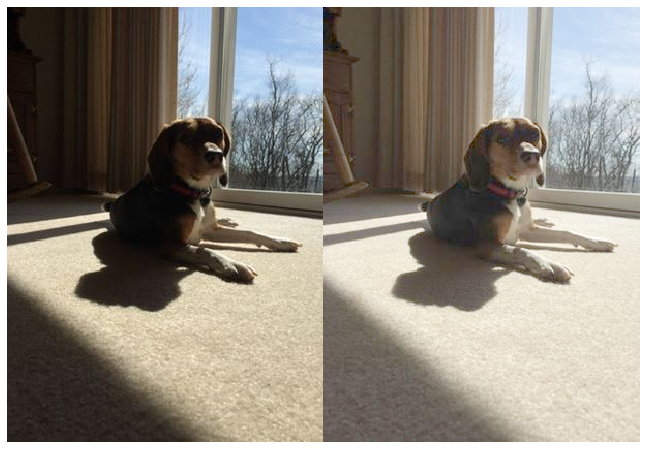

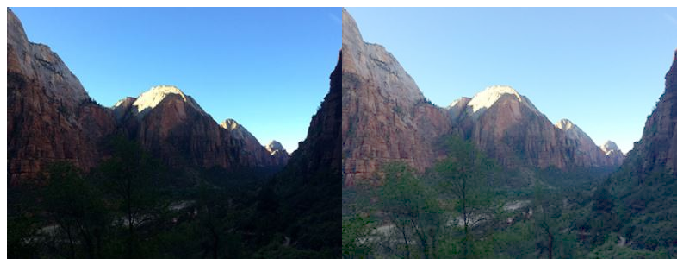

In [29]:
files = ['gamma1.jpg','gamma2.jpg', 'gamma3.jpg']

for f in files:
    img1 = cv2.imread(DIR + f)
    out = cv2.LUT(img1, table)
    imshow("", np.hstack((img1,out)))

## 영상 합성

In [30]:
img1 = cv2.imread(DIR + 'test1.jpg')
img2 = cv2.imread(DIR + 'test2.jpg')

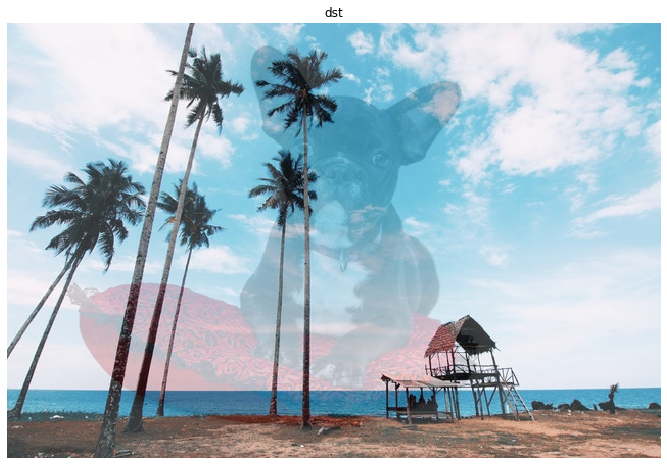

In [31]:
alpha = 0.8

dst = cv2.addWeighted(img1, alpha, img2, 1-alpha , 0.0)
imshow('dst', dst)

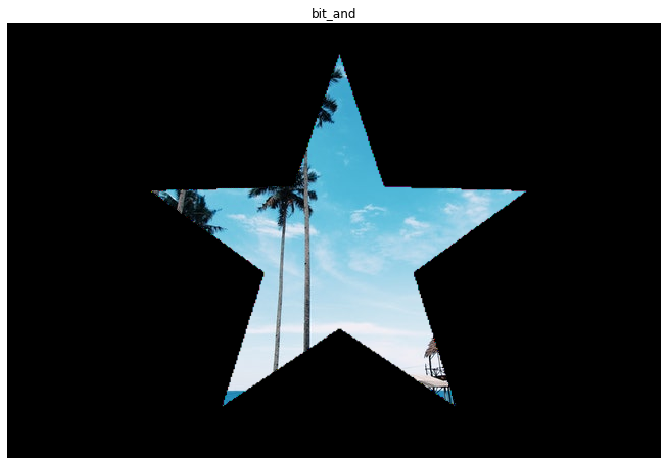

In [32]:
img1 = cv2.imread(DIR + 'test1.jpg')
img2 = cv2.imread(DIR + 'star.png')

img2 = cv2.resize(img2, dsize=(img1.shape[1],img1.shape[0])) # width, height 순서 유의

bit_and = cv2.bitwise_and(img1, img2)

imshow('bit_and', bit_and)

In [33]:
img1.shape

(426, 640, 3)

In [34]:
img1 = cv2.imread(DIR + 'test1.jpg')
img2 = cv2.imread(DIR + 'smile.png')

### for문으로 영상 합성
- 처리 속도가 느림

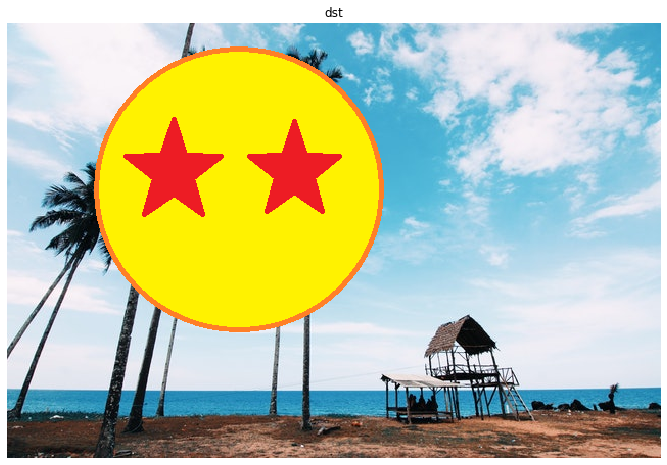

In [35]:
for r in range(img2.shape[0]):
    for c in range(img2.shape[1]):
        if np.mean(img2[r,c,:]) > 20:
            img1[r+0,c+0,:] = img2[r,c,:]
            
imshow('dst',img1)

### 비트 연산으로 영상 합성
- 처리 속도가 빠름
- 검정 영역은 투명 처리

(334, 471, 3)
(334, 471, 3)


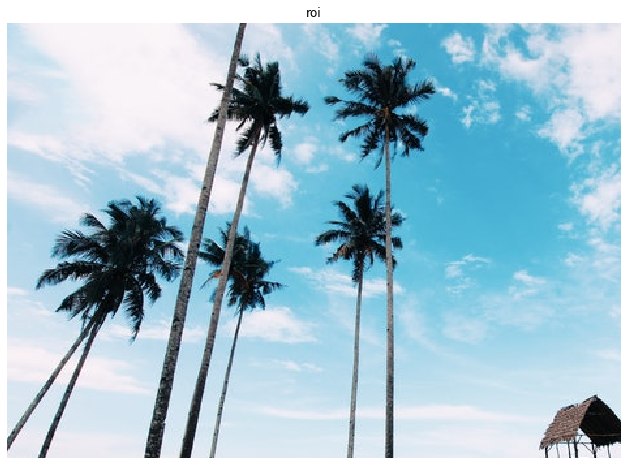

In [36]:
img1 = cv2.imread(DIR + 'test1.jpg')
img2 = cv2.imread(DIR + 'smile.png')

rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

print(roi.shape)
print(img2.shape)

imshow('roi', roi)

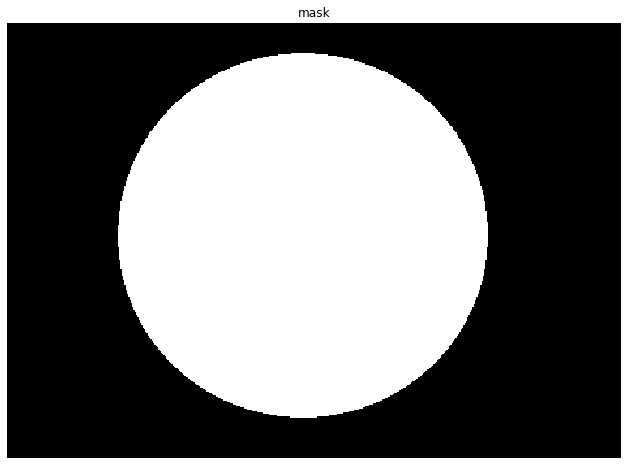

In [37]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY) # 10 이상은 다 255로 바꾸기
imshow('mask', mask)

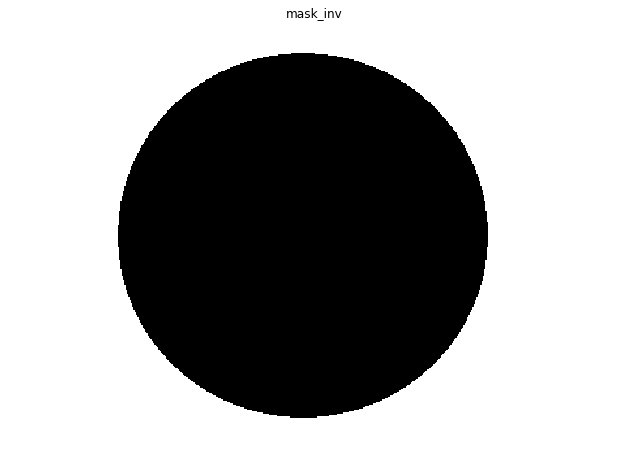

In [38]:
mask_inv = cv2.bitwise_not(mask)
imshow('mask_inv', mask_inv)

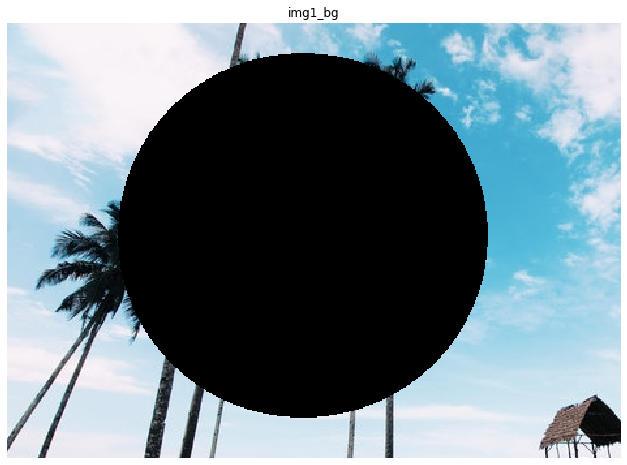

In [39]:
img1_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)
imshow('img1_bg', img1_bg)

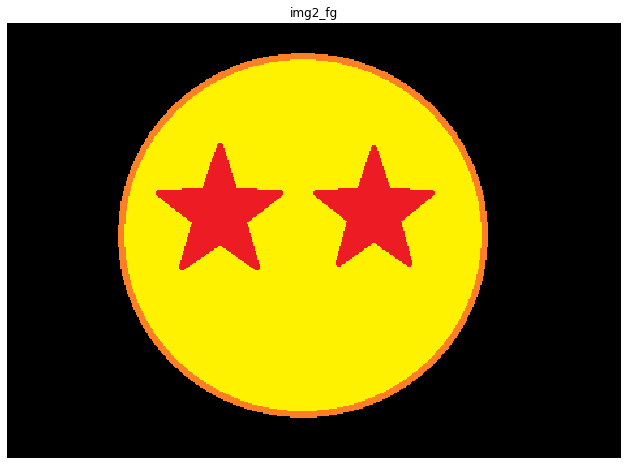

In [40]:
img2_fg = cv2.bitwise_and(img2,img2, mask=mask)
imshow('img2_fg', img2_fg)

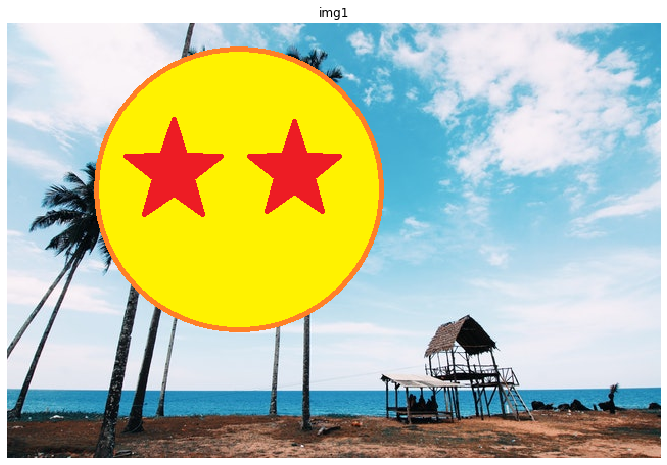

In [41]:
dst = cv2.add(img1_bg, img2_fg)
img1[0:rows,0:cols] =dst
imshow('img1', img1)

## 히스토그램

(array([15329., 31338., 20358., 35131., 41844., 50762., 33318., 17554.,
        15859.,   651.]),
 array([ 25.,  47.,  69.,  91., 113., 135., 157., 179., 201., 223., 245.]),
 <a list of 10 Patch objects>)

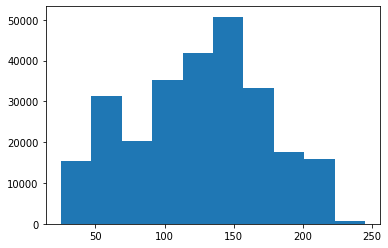

In [42]:
img = cv2.imread(DIR + 'lenna.bmp',0)
plt.hist(img.flatten())

(256, 1)


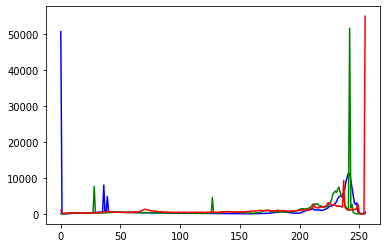

In [43]:
img = cv2.imread(DIR + 'lenna.bmp')

hist_b = cv2.calcHist([img1],[0], None, [256], [0,256])
hist_g = cv2.calcHist([img1],[1], None, [256], [0,256])
hist_r = cv2.calcHist([img1],[2], None, [256], [0,256])
print(hist_b.shape)

plt.plot(hist_b, 'b')
plt.plot(hist_g, 'g')
plt.plot(hist_r, 'r')

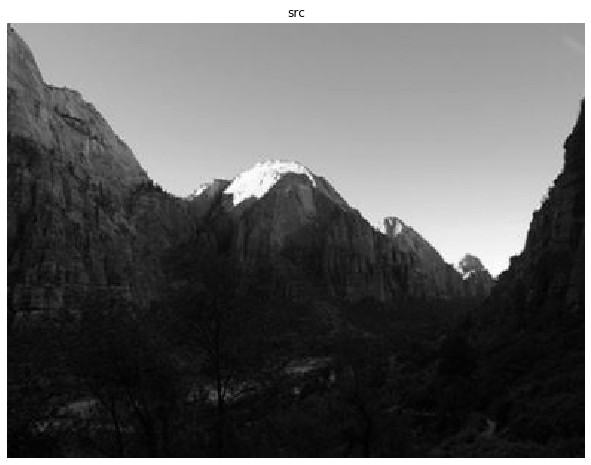

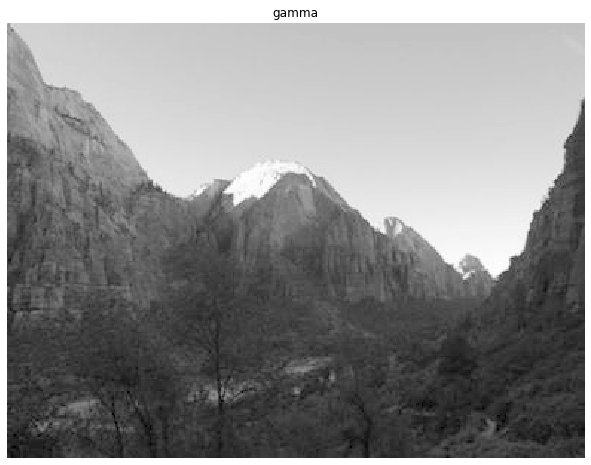

In [44]:
img3 = cv2.imread(DIR + 'gamma3.jpg', 0)

gamma = 0.5
table = np.array([((i/255.0)**gamma)*255 for i in np.arange(0,256)]).astype('uint8')

out = cv2.LUT(img3, table)

imshow("src",img3)
imshow("gamma", out)

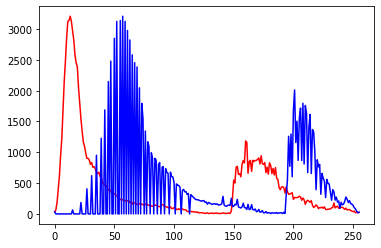

In [45]:
hist_1 = cv2.calcHist([img3],[0], None, [256], [0,256])
hist_2 = cv2.calcHist([out],[0], None, [256], [0,256])

plt.plot(hist_1, 'r')
plt.plot(hist_2, 'b')

### 히스토그램 stretch

In [46]:
src = cv2.imread(DIR + 'lenna.bmp', 0)
gmin = float(np.min(src))
gmax = float(np.max(src))

print(gmin, gmax)

25.0 245.0


In [47]:
dst = ((src-gmin) * 255. / (gmax-gmin)).astype(np.uint8)

gmin = float(np.min(dst))
gmax = float(np.max(dst))

print(gmin,gmax)

0.0 255.0


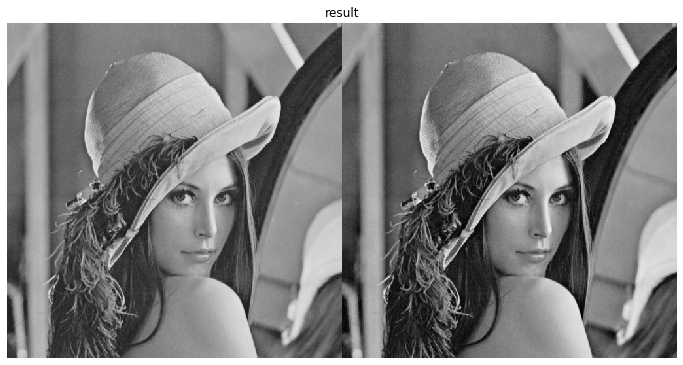

In [48]:
imshow('result', np.hstack((src,dst)))

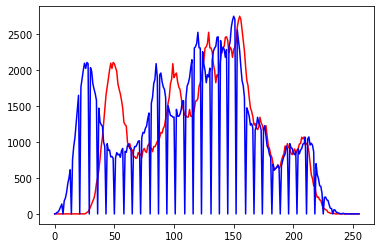

In [49]:
hist_1 = cv2.calcHist([src],[0], None, [256], [0,256])
hist_2 = cv2.calcHist([dst],[0], None, [256], [0,256])

plt.plot(hist_1, 'r')
plt.plot(hist_2, 'b')

In [54]:
img = cv2.imread(DIR + 'Crayfish.jpg')
dst = ((img-gmin) * 255. / (gmax-gmin)).astype(np.uint8) # 히스토그램 정규화
out = cv2.LUT(img, table) # LUT 대비 조정

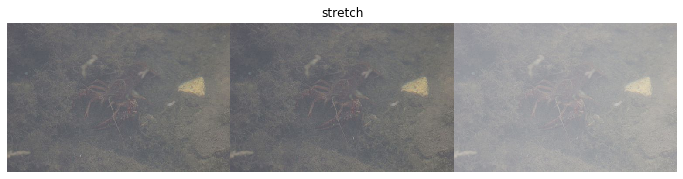

In [57]:
dst1 = np.hstack((dst, out))

imshow('stretch', np.hstack((img, dst1)))

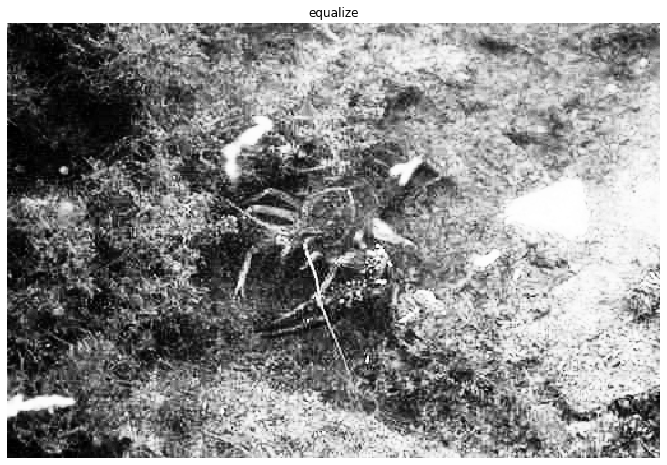

In [64]:
src = cv2.imread(DIR + 'Crayfish.jpg', 0)
dst = cv2.equalizeHist(src)
imshow('equalize', dst)

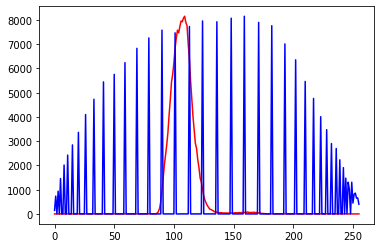

In [60]:
hist_1 = cv2.calcHist([src],[0], None, [256], [0,256])
hist_2 = cv2.calcHist([dst],[0], None, [256], [0,256])

plt.plot(hist_1, 'r')
plt.plot(hist_2, 'b')

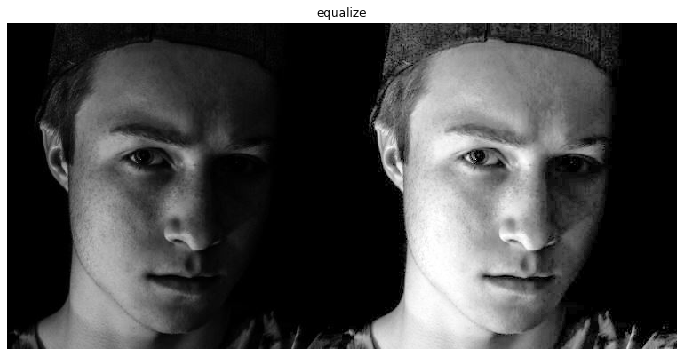

In [62]:
src = cv2.imread(DIR + 'face.jpg', 0)
dst = cv2.equalizeHist(src)
imshow('equalize', np.hstack((src,dst)))